# Modelo de regresión lineal

## Metodología
Los pasos a seguir para alcanzar el objetivo son los siguientes:

1. Importación de la base de datos.
2. Análisis de las variables para identificar el tipo de dato.
3. Verificación de valores `NaN` o Nulos.
4. Distribución de las variables.
5. Cálculo de la matriz de correlación.
6. Procesamiento de datos.
7. Resultados y discusión.

## Configuración
### Importación de librerías
Importamos todas las librerías necesarias para trabajar

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importación de datos
Importamos la base de datos para trabajar el problema de regresión

In [3]:
# 1. Importación de la base de datos
db_possum = pd.read_csv('datasets/possum.csv')
db_possum.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
# 2. Análisis de las variables para identificar el tipo de dato
db_possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [5]:
# 3. Verificación de valores NaN o nulos
db_possum.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

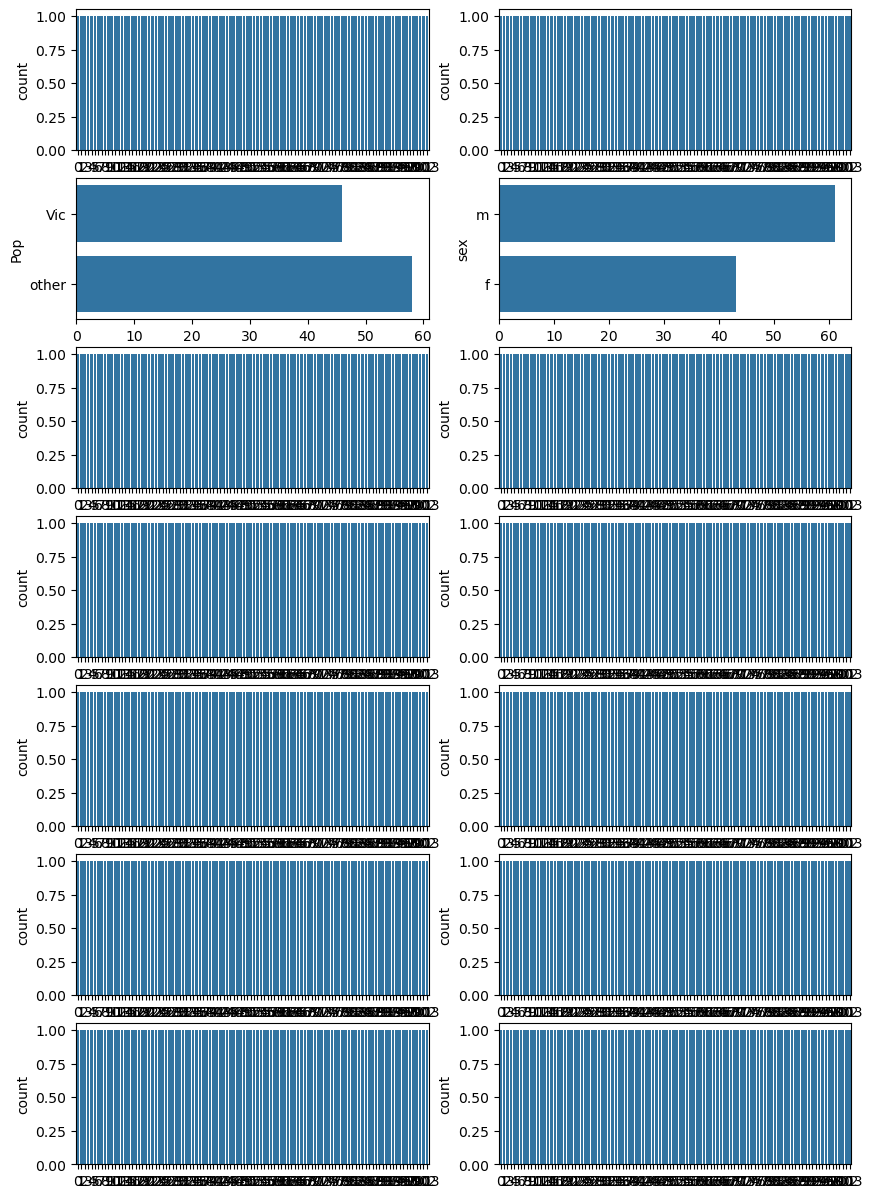

In [6]:
# 4. Distribución de las variables
cols = db_possum.columns
fig, axes = plt.subplots(7,2, figsize = (10,15))
k = 0

for i in range(7):
    for j in range(2):
        sns.countplot(db_possum[cols[k]], ax = axes[i][j])
        k = k + 1

<Axes: >

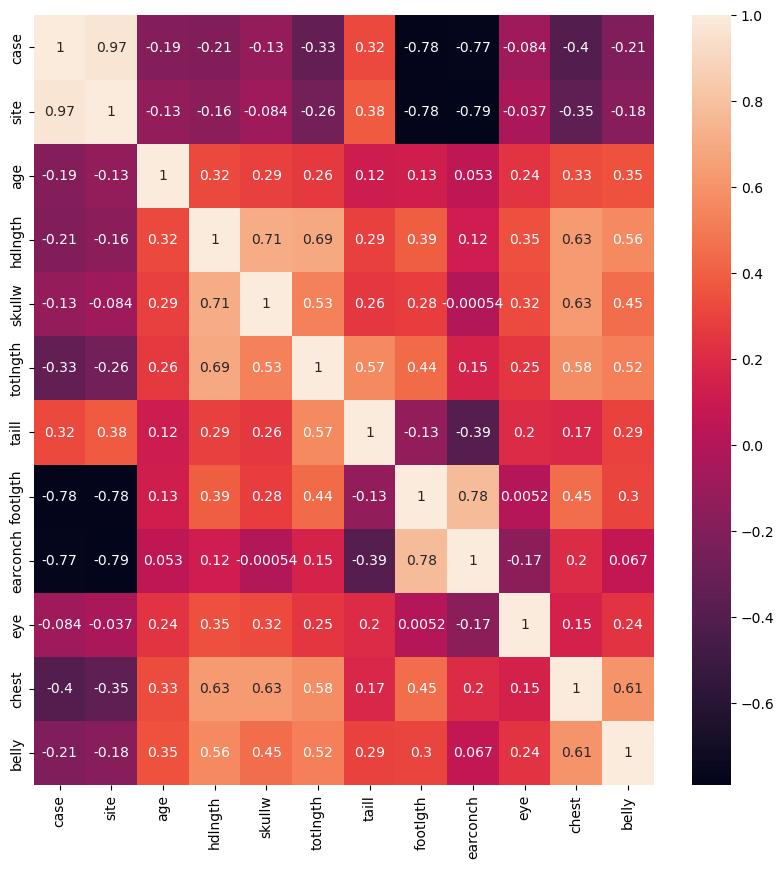

In [7]:
# 5. Cálculo de la matriz de correlación
fig = plt.figure(figsize = (10,10))
sns.heatmap(db_possum[db_possum.keys().drop(['Pop','sex'])].corr(), annot = True)

Text(0.5, 1.0, 'Linear regression')

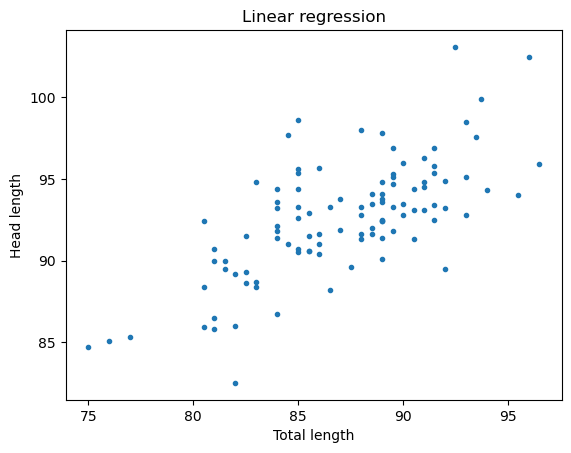

In [8]:
# 6. Procesamiento de datos
# Antes de generar un modelo de regresión lineal debemos representar los datos para observar si existe una relación. 
# Además, dicha relación debe ser cuantificada mediante un coeficiente de correlación
plt.plot(db_possum['totlngth'], db_possum['hdlngth'],'.')
plt.xlabel("Total length")
plt.ylabel("Head length")
plt.title('Linear regression')

In [9]:
X = np.array(db_possum['totlngth']).reshape(-1, 1)
y = db_possum['hdlngth']

# Libreria para divir el conjunto de datos experimentales en subconjuntos
from sklearn.model_selection import train_test_split

# El tamanio de la prueba especifica la cantidad de datos que desea reservar para el conjunto de prueba.
# El parametro Random_state es solo una semilla aleatoria que podemos usar.
# Puede usarlo si desea reproducir estos resultados especificos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 696)

m_ols.coef_: [0.61439705]
m_ols.intercept_: 39.080030085887024


Text(0.5, 1.0, 'Linear regression')

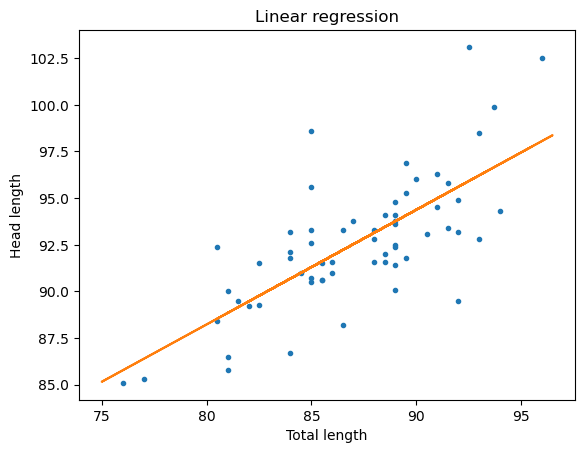

In [11]:
# 1. Creacion del modelo de regresion lineal
possum_ols = LinearRegression()

# 2. Ajuste del modelo de regresion lineal
possum_ols.fit(X = X_train, y = y_train)

# 3. Prediccion del modelo ajustado
possum_ols_y_pred = possum_ols.predict(X_test)

# 4. Se obtienen sus coeficientes
print("m_ols.coef_: {}".format(possum_ols.coef_))
print("m_ols.intercept_: {}".format(possum_ols.intercept_))

# 6. Evaluacion del modelo
from sklearn import metrics

results = {}
results['Results'] = {'MAE': metrics.mean_absolute_error(y_test,possum_ols_y_pred), 
                      'RMSE': metrics.mean_squared_error(y_test,possum_ols_y_pred),
                      'R2': metrics.r2_score(y_test,possum_ols_y_pred)}


pd.DataFrame(results)

# 7. Visualizacion del modelo de regresion
plt.plot(X_train, y_train,'.')
plt.plot(X_test, possum_ols_y_pred)
plt.xlabel("Total length")
plt.ylabel("Head length")
plt.title('Linear regression')